# Playground for Distance Metrics

- Stephen W. Thomas
- Used for MMA 869, MMAI 869, GMMA 869

In [1]:
import datetime
print(datetime.datetime.now())

2020-10-06 07:58:46.302793


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Default plot settings
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16


plt.rc('figure', figsize=[8.0, 5.0])     # controls the size of the figure
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('axes', grid=True)

# Distance Metrics for Simple Numeric Features

Let's make up some data and a nice plot for the slides

In [4]:
import scipy.spatial.distance as dist
import numpy as np
import itertools

# Prepare 3 vectors (data points) of 2 dimensions
points = pd.DataFrame(data={'id':['A', 'B', 'C'], 'dim1':[1, 2, 5], 'dim2':[1, 1, 5]})
display(points.head())

,id,dim1,dim2
0,A,1,1
1,B,2,1
2,C,5,5


In [5]:
for combo in itertools.combinations(points['id'], 2):
    v1 = points[points['id'] == combo[0]][['dim1', 'dim2']]
    v2 = points[points['id'] == combo[1]][['dim1', 'dim2']]
    
    print('\nPoints {} and {}:'.format(combo[0], combo[1]))
    print('Euclidean distance: {:.2f}'.format(dist.euclidean(v1, v2)))
    print('Manhattan distance: {:.2f}'.format(dist.cityblock(v1, v2)))
    print('Chebyshev distance: {:.2f}'.format(dist.chebyshev(v1, v2)))
    print('Canberra distance: {:.2f}'.format(dist.canberra(v1, v2)))
    print('Cosine distance: {:.2f}'.format(dist.cosine(v1, v2)))
    


Points A and B:
Euclidean distance: 1.00
Manhattan distance: 1.00
Chebyshev distance: 1.00
Canberra distance: 0.33
Cosine distance: 0.05

Points A and C:
Euclidean distance: 5.66
Manhattan distance: 8.00
Chebyshev distance: 4.00
Canberra distance: 1.33
Cosine distance: 0.00

Points B and C:
Euclidean distance: 5.00
Manhattan distance: 7.00
Chebyshev distance: 4.00
Canberra distance: 1.10
Cosine distance: 0.05


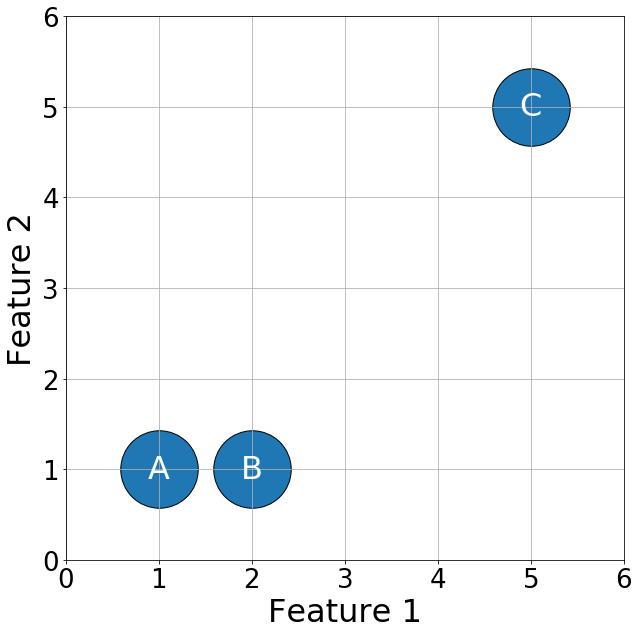

In [6]:
plt.figure(figsize=(10, 10));
plt.grid(True);

plt.scatter(points['dim1'], points['dim2'], s=6000, marker='o', edgecolors='black');
#plt.title("Distances", fontsize=20);
plt.xlabel('Feature 1', fontsize=32);
plt.ylabel('Feature 2', fontsize=32);
plt.xticks(fontsize=26);
plt.yticks(fontsize=26);
plt.xlim(left=0, right=6);
plt.ylim(bottom=0, top=6);

for i, txt in enumerate(points['id']):
    plt.text(x=points['dim1'].iloc[i], y=points['dim2'].iloc[i], s=txt, fontsize=32, 
             horizontalalignment='center', verticalalignment='center', color='white');
    
plt.show();